<a href="https://colab.research.google.com/github/DilakshanRahul12/CM2604/blob/main/EDA_Bank_additional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
dataset = '/content/drive/MyDrive/CM2604/dataset/bank-additional/bank-additional-full.csv'

In [21]:
df = pd.read_csv(dataset, sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
df.shape

(41188, 21)

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1mxrM39_fgRIHaKUUL3hFz6W6o8ql3dqB95r-oK1-h20#gid=0


## Data Overview

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [25]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [26]:
for col in df.columns:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")

--- age ---
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64


--- job ---
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


--- marital ---
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


--- education ---
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


--- default ---
default
no         32588
unknown     8597
yes            3
Name: count, dty

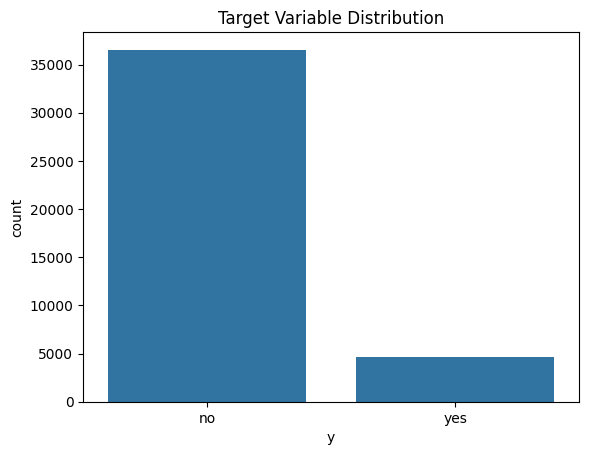



y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


In [27]:
sns.countplot(x='y', data=df)
plt.title('Target Variable Distribution')
plt.show()
print("\n")
#Percentage distribution
print(df['y'].value_counts(normalize=True) * 100)

### Numeric

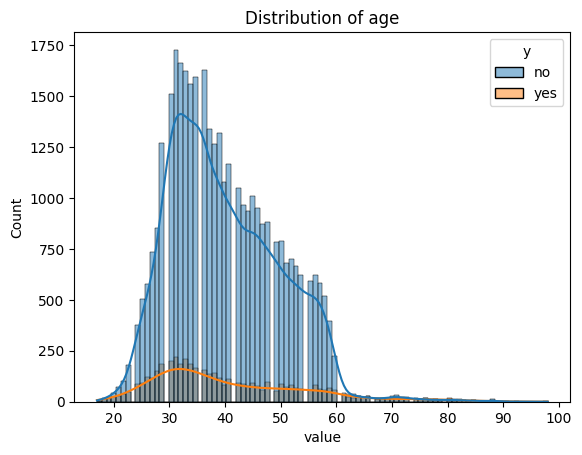

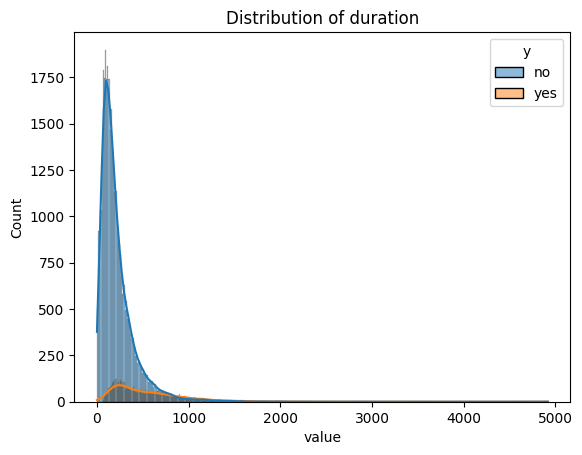

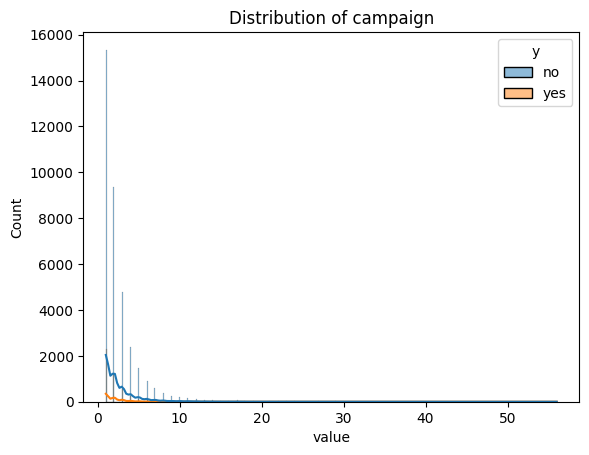

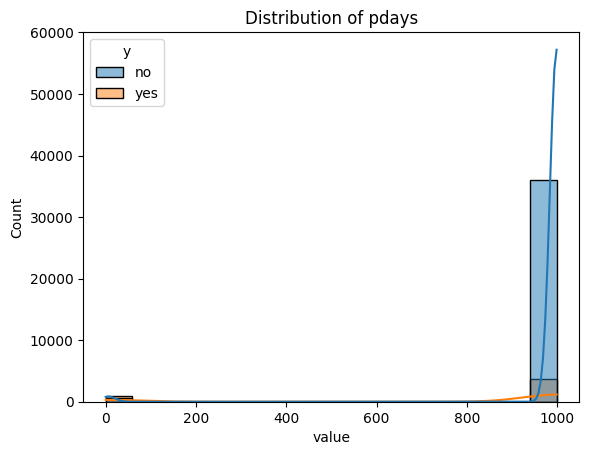

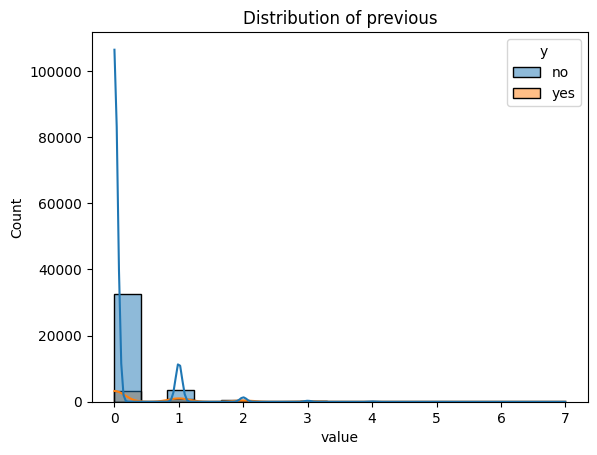

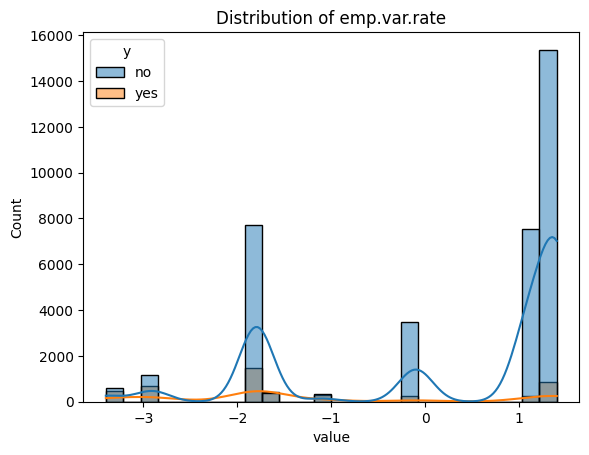

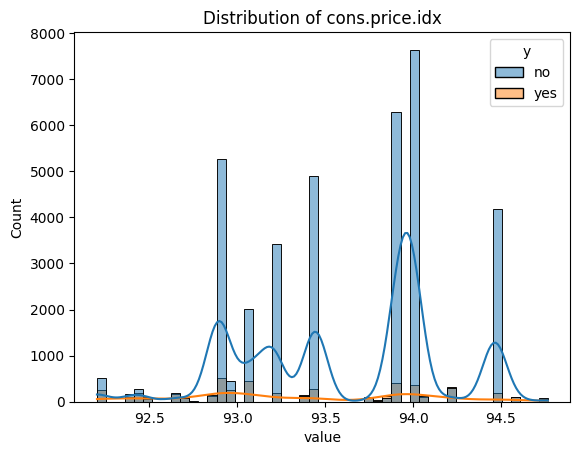

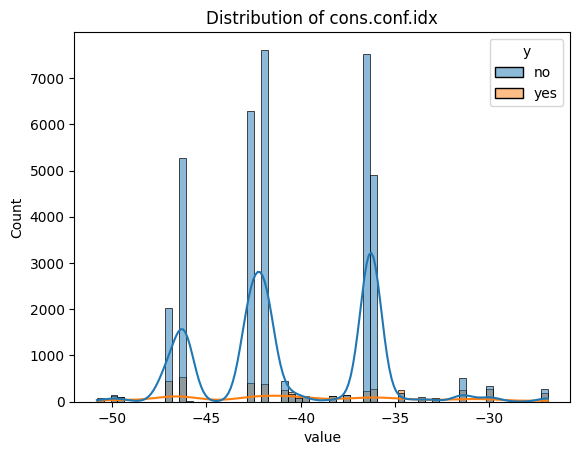

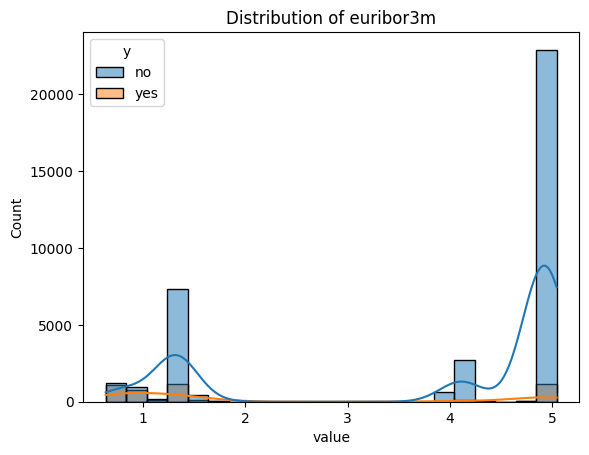

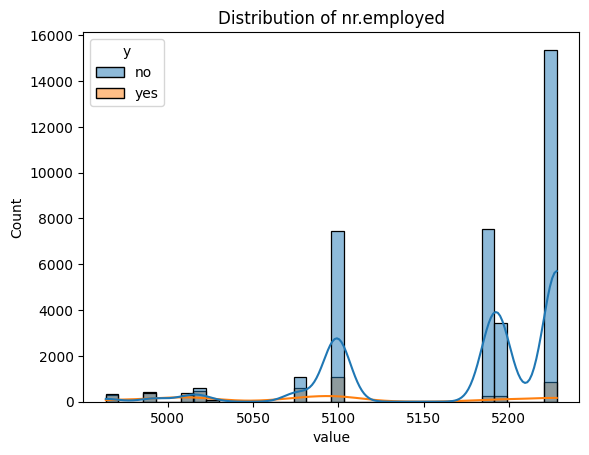

In [28]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    # Melt the dataframe to convert it to long-form
    df_melted = pd.melt(df, id_vars=['y'], value_vars=[col])  # 'y' is the hue column

    # Now use the melted dataframe for histplot
    sns.histplot(data=df_melted, x='value', hue='y', kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#### <font color = "gold">Observations</font>

***con.price.idx ~ Comb Distribution***

### Categorial

job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64


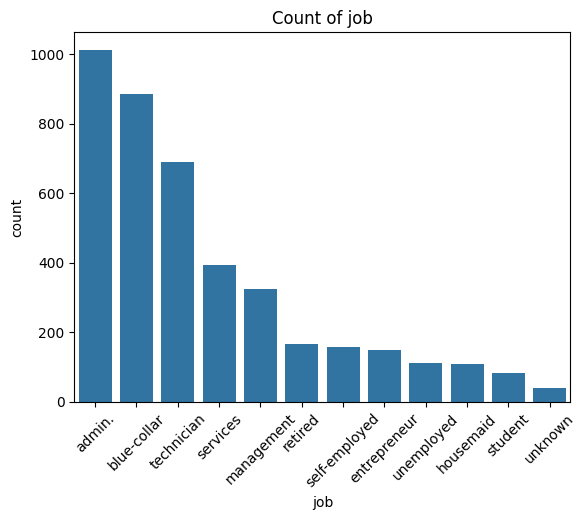

marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64


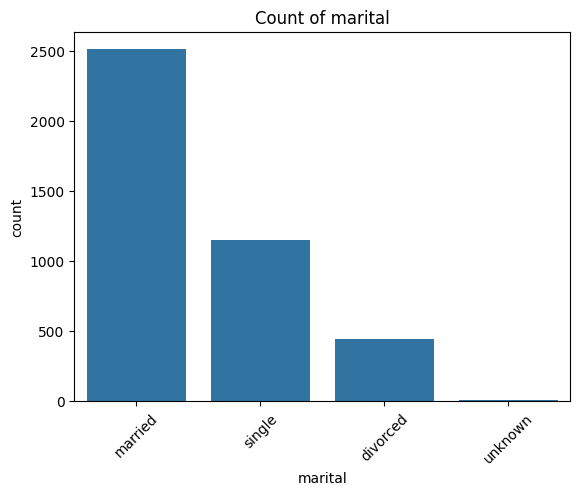

education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64


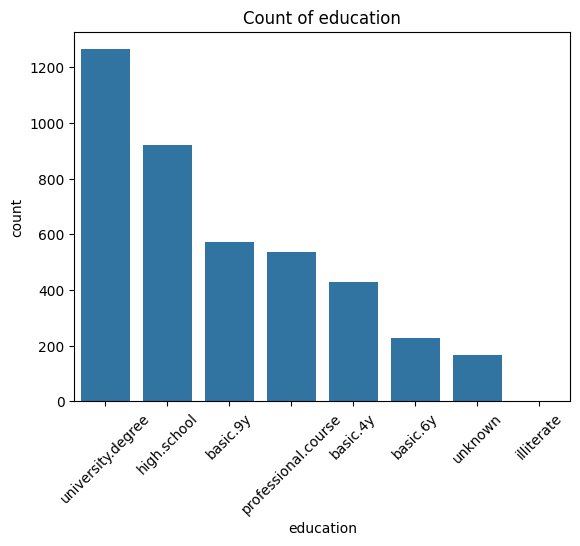

default
no         3315
unknown     803
yes           1
Name: count, dtype: int64


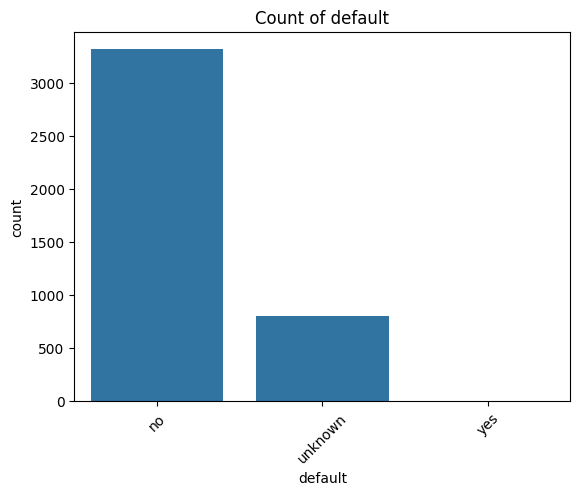

housing
yes        2175
no         1839
unknown     105
Name: count, dtype: int64


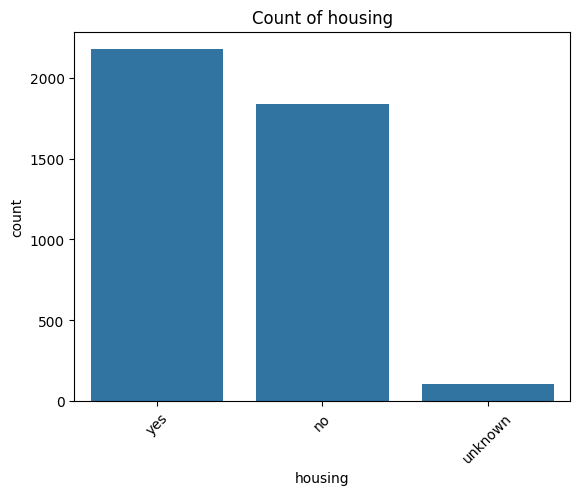

loan
no         3349
yes         665
unknown     105
Name: count, dtype: int64


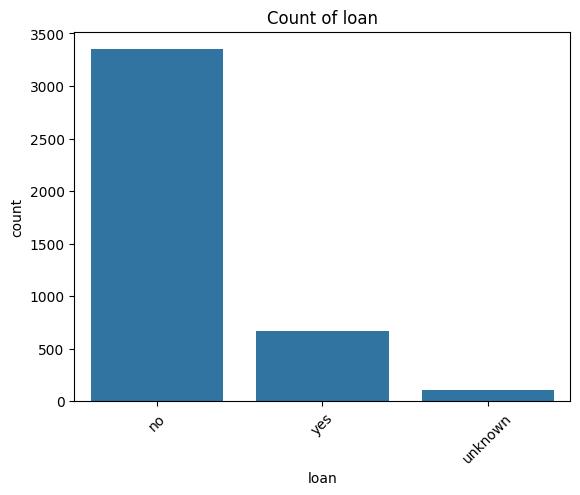

contact
cellular     2652
telephone    1467
Name: count, dtype: int64


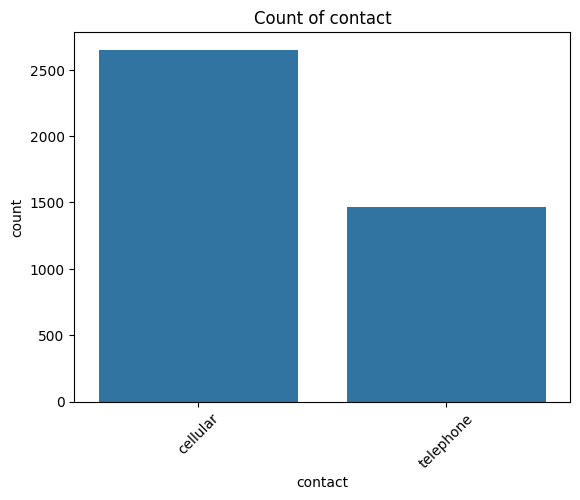

month
may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: count, dtype: int64


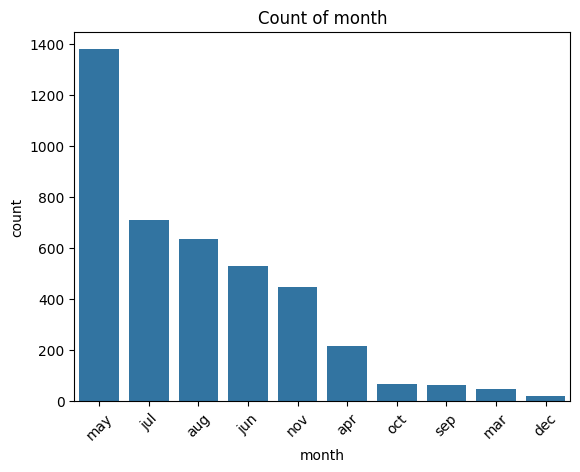

day_of_week
thu    860
mon    855
tue    841
wed    795
fri    768
Name: count, dtype: int64


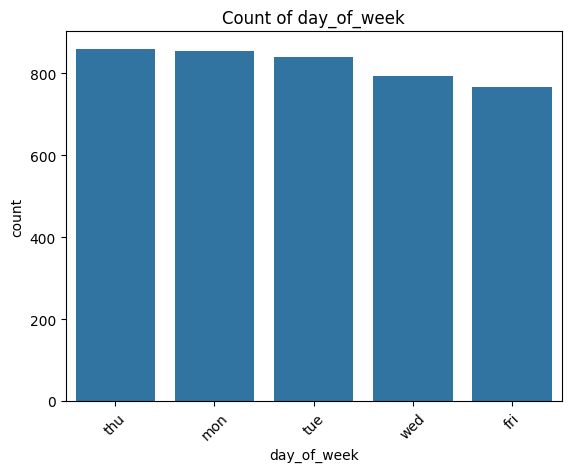

poutcome
nonexistent    3523
failure         454
success         142
Name: count, dtype: int64


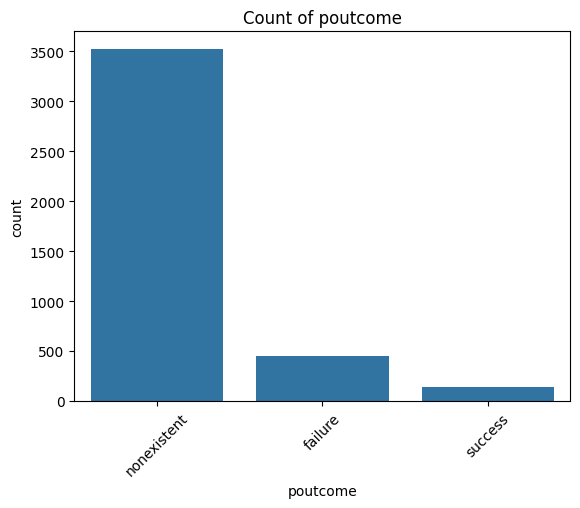

y
no     3668
yes     451
Name: count, dtype: int64


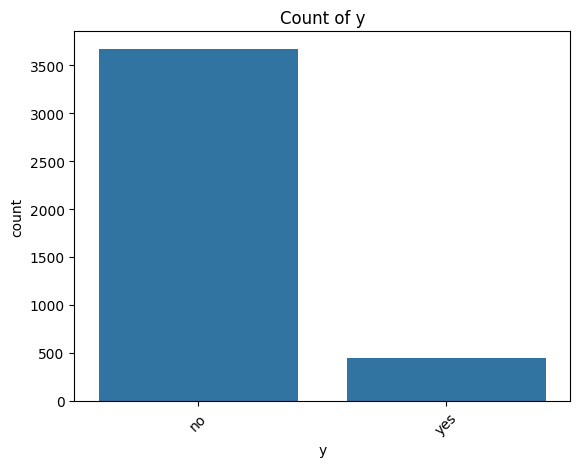

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(df[col].value_counts())
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

### Numerical vs. Target

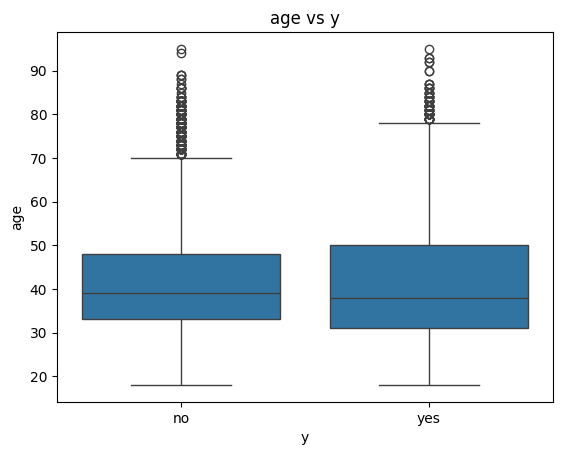

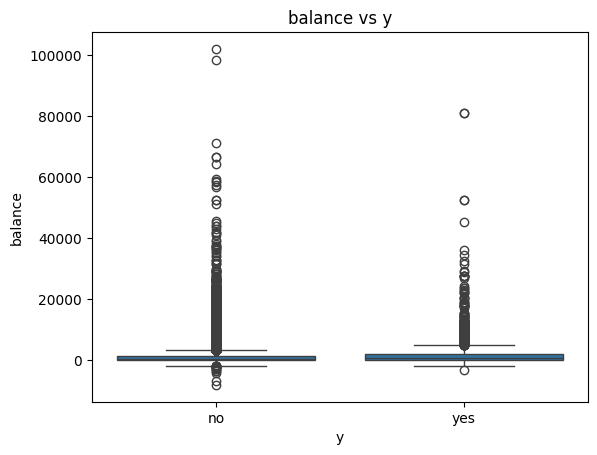

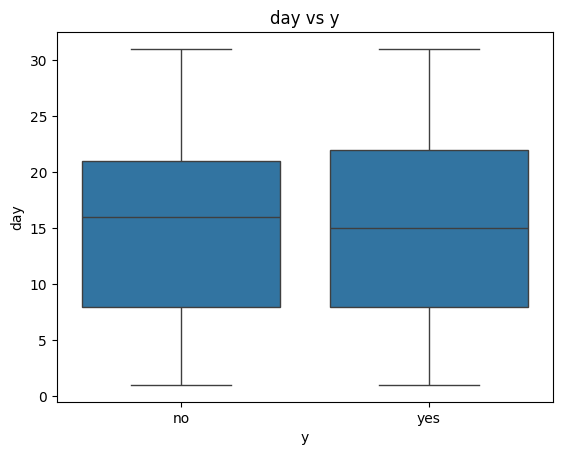

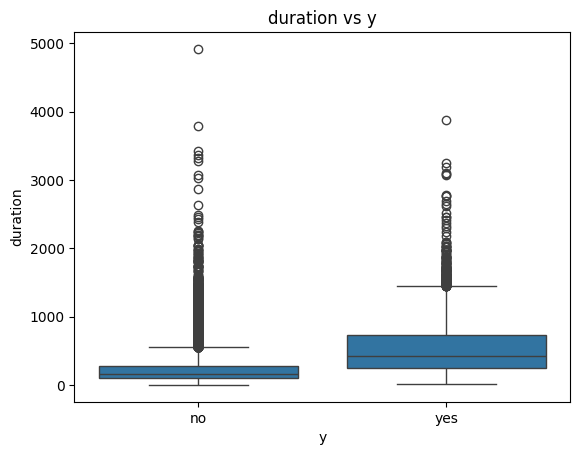

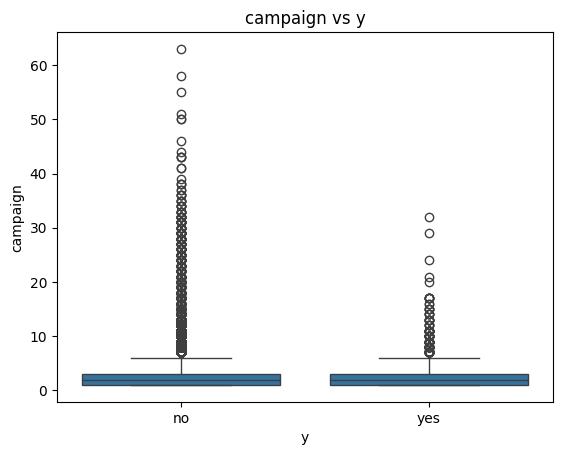

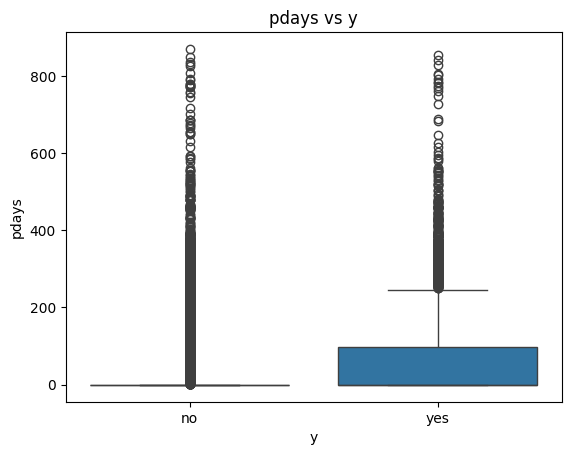

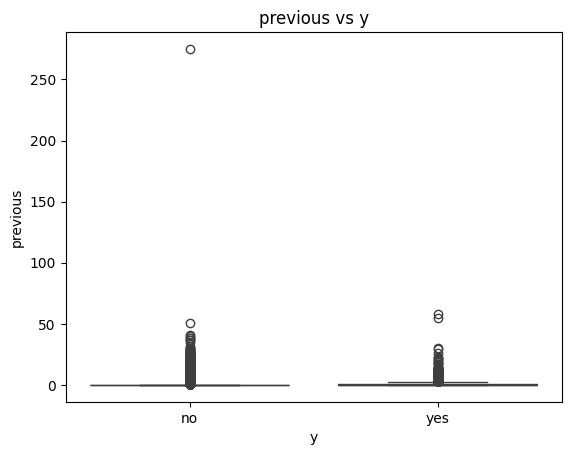

In [ ]:
for col in numeric_cols:
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'{col} vs y')
    plt.show()


### Categorical vs. Target

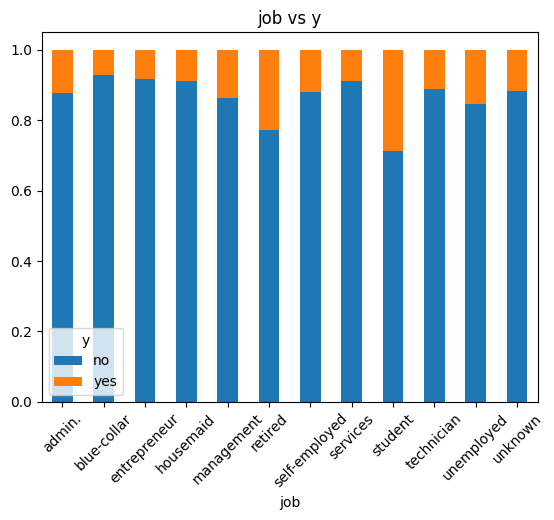

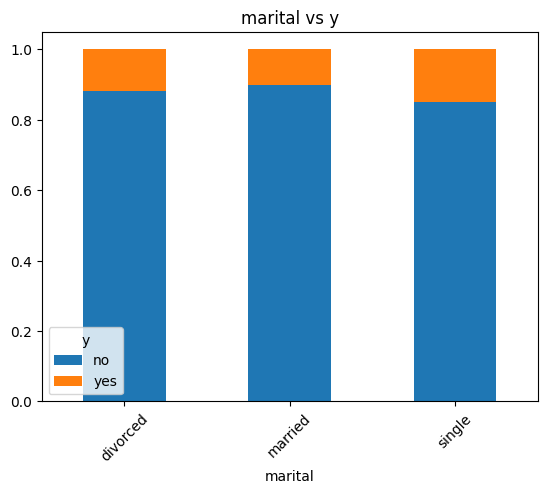

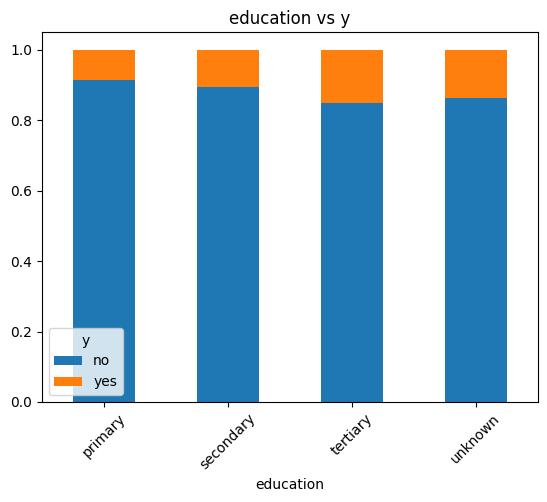

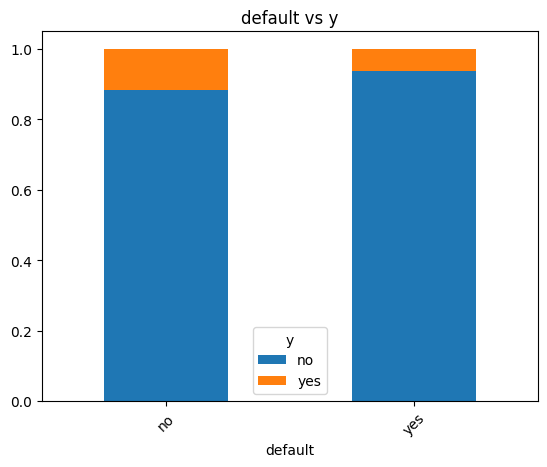

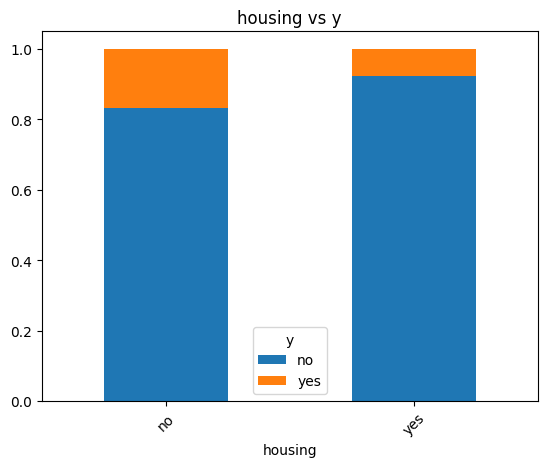

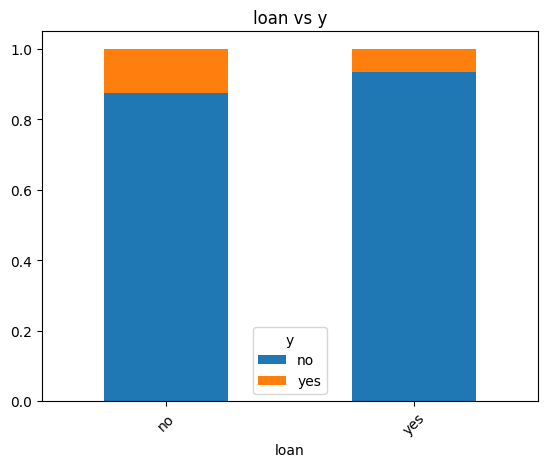

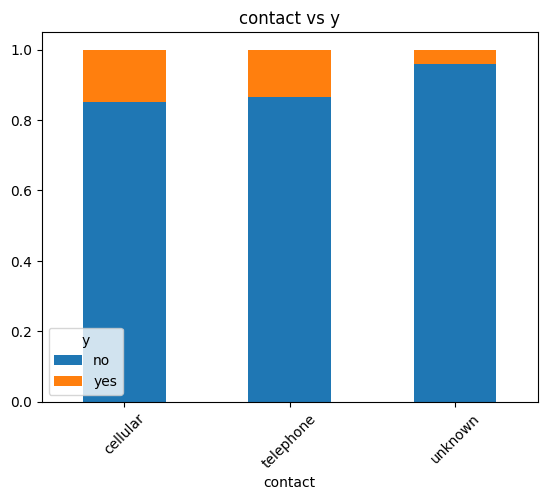

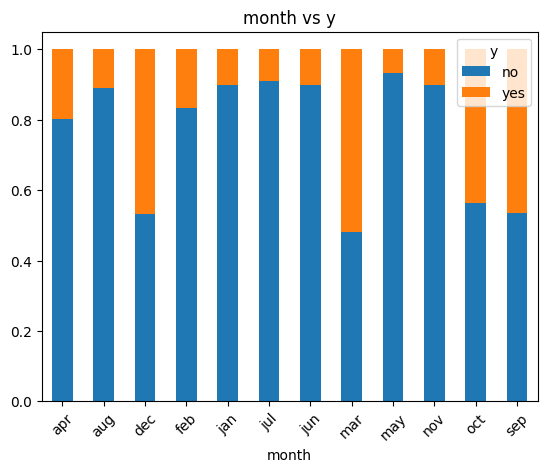

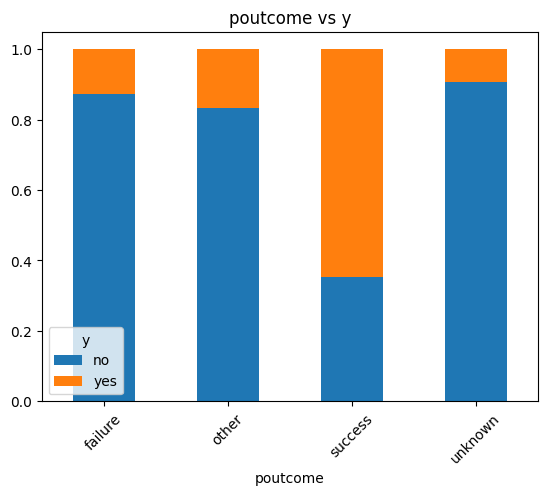

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  if col != 'y':
    pd.crosstab(df[col], df['y'], normalize='index').plot(kind='bar', stacked=True)
    plt.title(f'{col} vs y')
    plt.xticks(rotation=45)
    plt.show()

### Correlation

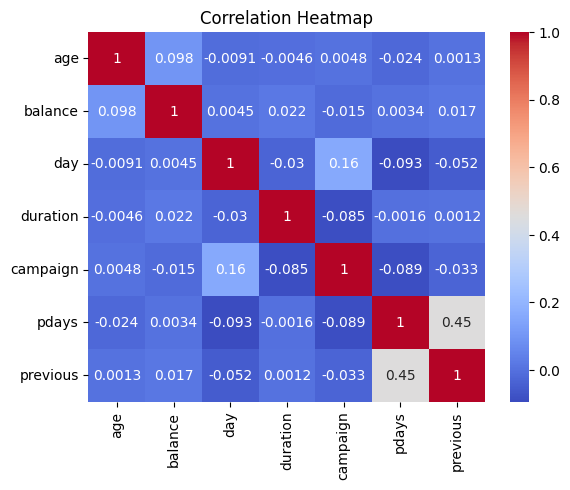

In [ ]:
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

 ### Duration?

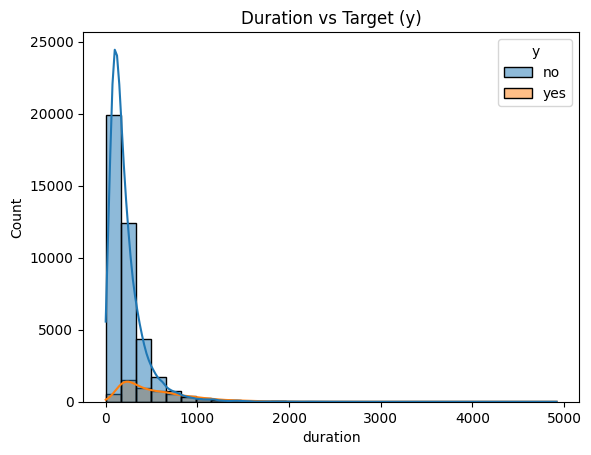

In [ ]:
sns.histplot(df, x='duration', hue='y', kde=True, bins=30)
plt.title('Duration vs Target (y)')
plt.show()


### UNKNOWN

Job : unknown

In [29]:
unknown_job_yes = len(df[(df['job'] == 'unknown') & (df['y'] == 'yes')])
unknown_job_no = len(df[(df['job'] == 'unknown') & (df['y'] == 'no')])
print(f"Number of instances where job is unknown subscribed : {unknown_job_yes}")
print(f"Number of instances where job is unknown not subscribed : {unknown_job_no}")

Number of instances where job is unknown subscribed : 37
Number of instances where job is unknown not subscribed : 293


In [30]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
  if col != 'y':  # Exclude the target variable
    unknown_counts = df[df[col] == 'unknown']['y'].value_counts()
    total_unknown = unknown_counts.sum()

    if total_unknown > 0:  # Only print if there are unknown values
      print(f"--- {col} ---")
      print(unknown_counts)
      print(f"Total unknown: {total_unknown}\n")

--- job ---
y
no     293
yes     37
Name: count, dtype: int64
Total unknown: 330

--- marital ---
y
no     68
yes    12
Name: count, dtype: int64
Total unknown: 80

--- education ---
y
no     1480
yes     251
Name: count, dtype: int64
Total unknown: 1731

--- default ---
y
no     8154
yes     443
Name: count, dtype: int64
Total unknown: 8597

--- housing ---
y
no     883
yes    107
Name: count, dtype: int64
Total unknown: 990

--- loan ---
y
no     883
yes    107
Name: count, dtype: int64
Total unknown: 990



total

In [31]:
unknown_counts = df.apply(lambda row: sum(1 for val in row if val == 'unknown'), axis=1)
total_unknown_instances = unknown_counts.sum()
print(f"Total number of unknown instances across the whole DataFrame (unique per row): {total_unknown_instances}")

Total number of unknown instances across the whole DataFrame (unique per row): 12718


## Unknowns dropped dataset


In [39]:
df_clean = df.replace("unknown", None).dropna()

In [40]:
df_clean.shape

(30488, 21)

In [41]:
loss_percentage = (len(df) - len(df_clean)) / len(df) * 100
print(f"Loss percentage: {loss_percentage:.2f}%")

Loss percentage: 25.98%


In [43]:
df_clean.to_csv('df_clean.csv', index=False)
from google.colab import files
files.download('df_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>